# Application: Recovering Planetary Periods from Radial Velocity Curves

One method of detecting exoplanets is to look at the motion of a star around the center of mass
due to unseen planets--this is the [Doppler radial velocity technique](https://en.wikipedia.org/wiki/Doppler_spectroscopy).

We'll look at an idealized example here.  Imagine that we have continuous observations of a system
and measure the radial velocity of the central star at equally-spaced time-intervals.  We can
look at the FFT to see what frequencies dominate in the system.

```{tip}
For real observations, the data points will be unevenly spaced in time, and there will be periods when the system is not observed at all.  For this case, the [Lomb-Scargle periodogram](https://docs.astropy.org/en/latest/timeseries/lombscargle.html) is a better technique.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Sample data

We'll generate our data using the [symplectic integrator / planetary example example](https://zingale.github.io/computational_astrophysics/ODEs/application-planetary-stability.html) we explored previously.

Here's a data file that contains $(t, v_{star,rad})$: {download}`radial_velocity.dat`

In [8]:
data = np.loadtxt("radial_velocity.dat")

In [9]:
t = data[:, 0]
vel = data[:, 1]

Text(0, 0.5, '$v_{\\star,r}$ [AU/year]')

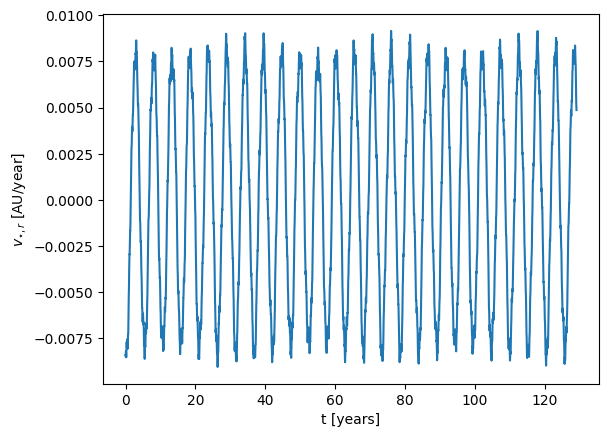

In [10]:
fig, ax = plt.subplots()
ax.plot(t, vel)
ax.set_xlabel("t [years]")
ax.set_ylabel(r"$v_{\star,r}$ [AU/year]")

## Fourier transform

Now we can look at the FFT of the data.

In [11]:
F = np.fft.rfft(vel)

In [12]:
kfreq = np.fft.rfftfreq(len(t), d=t.max() / len(t))

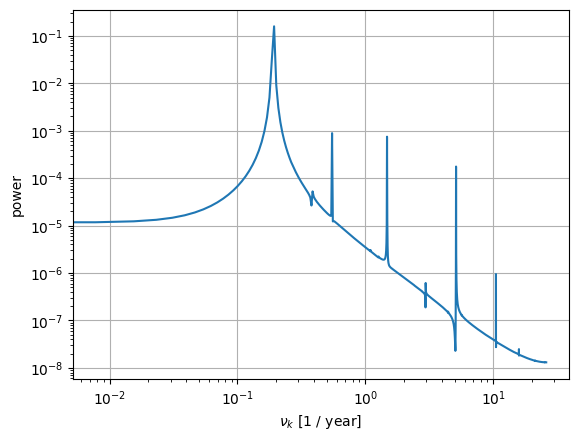

In [14]:
fig, ax = plt.subplots()
ax.plot(kfreq, np.abs(F)**2 * 2 / len(t))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("power")
ax.set_xlabel(r"$\nu_k$ [1 / year]")
ax.grid()

## Comparing to truth

This data was generated with 4 planets around a star with a mass of $M = 0.3 M_\odot$.  In our units, Kepler's law
would be:

$$a^3 = M_\star P^2$$

The initial semi-major axes were $a = 2, 1, 0.5, 0.2~\mathrm{AU}$.

So the periods and expected frequencies of the orbits are:

In [15]:
av = np.array([2, 1, 0.5, 0.2])
M = 0.3
Ps = np.sqrt(av**3/M)
freq = 1/Ps

In [16]:
Ps

array([5.16397779, 1.82574186, 0.64549722, 0.16329932])

We can plot these expected frequencies on our FFT.

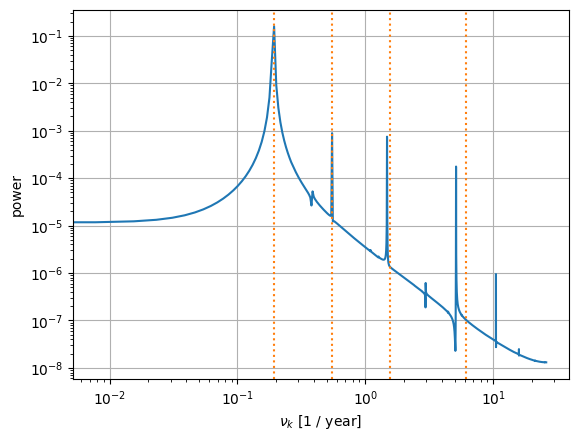

In [17]:
for f in freq:
    ax.axvline(x=f, color="C1", ls=":")
fig

## Plotting the orbits

We can also look at the data for the planet orbits.  Here's a file that contains the time, and $(x, y)$ positions
of all of the objects (star and planets): {download}`planet_positions.dat`

In [11]:
data = np.genfromtxt("planet_positions.dat", names=True)

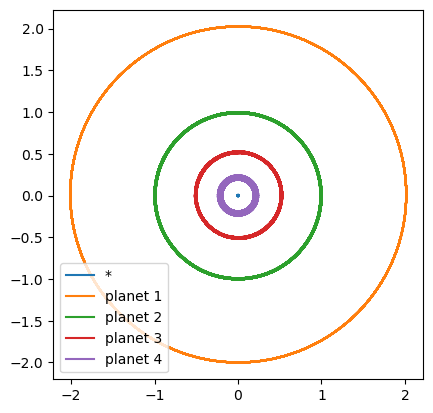

In [12]:
fig, ax = plt.subplots()

ax.plot(data["x_star"], data["y_star"], label="*")
for n in range(1, 5):
    ax.plot(data[f"x_p{n}"], data[f"y_p{n}"], label=f"planet {n}")

ax.set_aspect("equal")
ax.legend()

We see that the innermost planet's orbit is a bit wobbly.